# Setup

In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from tqdm import tqdm

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
%cd drive/MyDrive/dataset/DSA4212

In [ ]:
data = np.load("cities.npy", allow_pickle = True)

In [ ]:
x = np.transpose(data)[0]
y = np.transpose(data)[1]

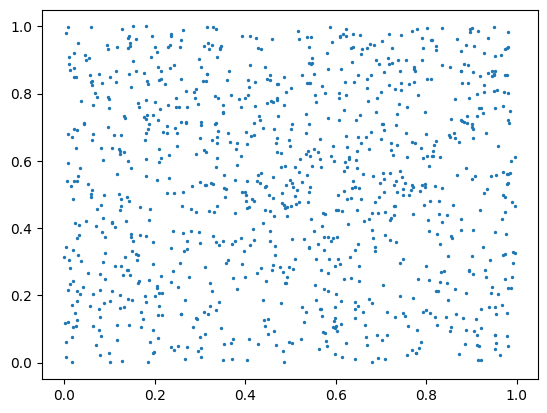

In [ ]:
plt.scatter(x,y,s=2)

# Define distance matrix

In [ ]:
def euclidean_dist(a,b):
  return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [ ]:
n = 1000
distances = np.zeros((n,n))
for i in range(n):
  for j in range(i, n):
    dist = euclidean_dist(data[i], data[j])
    distances[i][j] = dist
    distances[j][i] = dist

# Nearest Neighbour

In [ ]:
visited = set()
route = []

def nearest_neighbour(city):
  dist = np.inf
  nearest = 1000
  for i in range(n):
    if distances[i][city] < dist and i not in visited:
      dist = distances[i][city]
      nearest = i
  return nearest

def tour(starting):
  current = starting
  visited.add(starting)
  
  route.append(current)
  total_dist = 0
  while len(visited) < n:
    next = nearest_neighbour(current)
    visited.add(next)
    route.append(next)
    total_dist += distances[current][next]
    current = next
  
  #final route does not include starting point, but total_distance does
  total_dist += distances[current][starting]

  return total_dist

We run the nearest neighbours starting at each city, to find the best city to start from



In [ ]:
track = np.inf
best = 0

for i in tqdm(range(n)):
  visited = set()
  route = []
  new = tour(i)
  if new < track:
    track = new
    best = i

100%|██████████| 1000/1000 [05:17<00:00,  3.15it/s]


In [ ]:
print("The best place to start for nearest neighbours is: ", best)

The best place to start for nearest neighbours is:  858


In [ ]:
visited = set()
route = []
tour(best)

27.936835400493667

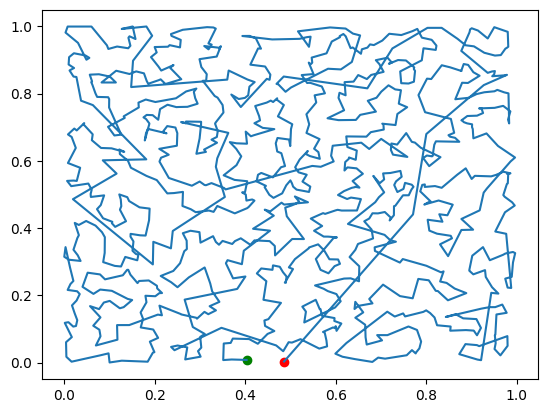

In [ ]:
new_x = x[route]
new_y = y[route]

plt.plot(new_x, new_y)
plt.scatter(new_x[0], new_y[0], color = "green")
plt.scatter(new_x[-1], new_y[-1], color = "red")

# 2-opt 

In [ ]:
def route_length(route):
  return sum(distances[route[i]][route[i+1]] for i in range(len(route)-1)) + distances[route[0]][route[-1]]

In [ ]:
route_length(route) #check that the functions output tallies with previously computed value

27.936835400493667

In the following two-opt code, we only run the outer loop from 'start', which is 5 cities before the city where the two-opt algo last cut the cycle to improve the distance. This approximation improves the time taken for the function to run greatly.

In [ ]:
def two_opt(route):
  n = len(route)
  improved = True
  best_distance = route_length(route)
  start = 1
  while improved:
    improved = False
    best_distance = route_length(route)
    for i in tqdm(range(start,n-2)):
      if improved:
        break
      for j in range(i+1, n-1):
        new_route = route[:i] + route[i:j+1][::-1] + route[j+1:]
        new_distance = route_length(new_route)
        if new_distance < best_distance:
          route = new_route
          best_distance = new_distance
          print("best: ", best_distance)
          improved = True
          start = max(i - 5, start) #does not start the next loop from 0, so the code can run faster
        if improved:
          break
  return route

In [ ]:
new_route = two_opt(route)

  0%|          | 3/997 [00:00<04:51,  3.41it/s]


best:  27.922850812077083


  0%|          | 3/997 [00:00<03:54,  4.23it/s]


best:  27.899401390033912


  0%|          | 3/997 [00:00<03:59,  4.14it/s]


best:  27.871053685447354


  1%|▏         | 14/997 [00:06<07:46,  2.11it/s]


best:  27.870803268511334


  1%|          | 7/989 [00:02<04:57,  3.30it/s]


best:  27.8649092011046


  1%|          | 7/988 [00:02<04:53,  3.35it/s]


best:  27.822946253214376


  1%|          | 9/987 [00:02<04:59,  3.26it/s]


best:  27.821720640635245


  1%|          | 6/984 [00:01<04:49,  3.38it/s]


best:  27.819579547812843


  1%|          | 6/984 [00:03<09:15,  1.76it/s]


best:  27.808234174235686


  1%|▏         | 14/984 [00:04<05:40,  2.85it/s]


best:  27.79429190268233


  1%|          | 6/976 [00:01<04:39,  3.47it/s]


best:  27.790665160733138


  1%|          | 6/976 [00:01<04:33,  3.54it/s]


best:  27.785820953049907


  1%|          | 12/976 [00:05<07:10,  2.24it/s]


best:  27.77880212282107


  1%|          | 7/970 [00:02<05:42,  2.81it/s]


best:  27.77616187873105


  1%|▏         | 14/969 [00:04<05:07,  3.11it/s]


best:  27.770842255518133


  1%|          | 6/961 [00:01<05:05,  3.13it/s]


best:  27.758777350251712


  1%|          | 6/961 [00:01<05:03,  3.15it/s]


best:  27.75873853186688


  1%|          | 6/961 [00:03<10:06,  1.58it/s]


best:  27.756048175989175


  1%|          | 9/961 [00:02<04:45,  3.34it/s]


best:  27.755622849138987


  1%|          | 7/958 [00:02<04:47,  3.30it/s]


best:  27.735890149547757


  0%|          | 4/957 [00:01<04:37,  3.44it/s]


best:  27.726818016180324


  1%|          | 10/957 [00:03<04:59,  3.16it/s]


best:  27.702112292213908


  1%|▏         | 12/953 [00:05<07:32,  2.08it/s]


best:  27.70052210730854


  2%|▏         | 20/947 [00:06<04:55,  3.13it/s]


best:  27.654689056223013


  1%|          | 9/933 [00:03<05:27,  2.82it/s]


best:  27.640355626162183


  1%|          | 7/930 [00:03<07:26,  2.07it/s]


best:  27.634250916510158


  1%|          | 11/929 [00:03<05:04,  3.02it/s]


best:  27.61428147058576


  1%|          | 6/924 [00:01<04:47,  3.20it/s]


best:  27.595840876820635


  1%|          | 6/924 [00:01<04:53,  3.13it/s]


best:  27.556927807241347


  1%|          | 7/924 [00:02<05:43,  2.67it/s]


best:  27.525041823363317


  1%|          | 6/923 [00:03<08:07,  1.88it/s]


best:  27.500042196607584


  1%|          | 8/923 [00:02<04:16,  3.57it/s]


best:  27.4892950233786


  2%|▏         | 16/921 [00:04<04:26,  3.39it/s]


best:  27.48888219332899


  3%|▎         | 25/911 [00:09<05:44,  2.57it/s]


best:  27.485391317982728


  1%|          | 6/892 [00:01<04:20,  3.41it/s]


best:  27.468860868028038


  1%|          | 6/892 [00:01<03:53,  3.79it/s]


best:  27.443096131065


  1%|          | 6/892 [00:01<04:17,  3.45it/s]


best:  27.420341126814314


  2%|▏         | 15/892 [00:06<06:08,  2.38it/s]


best:  27.41572832725876


  4%|▎         | 33/883 [00:10<04:41,  3.02it/s]


best:  27.407614808565537


  1%|▏         | 12/856 [00:04<04:57,  2.84it/s]


best:  27.406720021319085


  3%|▎         | 22/850 [00:06<04:00,  3.44it/s]


best:  27.40343028700775


  1%|          | 5/834 [00:01<04:24,  3.13it/s]


best:  27.399289272220884


  0%|          | 4/834 [00:02<07:40,  1.80it/s]


best:  27.389015494046742


  1%|          | 5/834 [00:01<04:58,  2.78it/s]


best:  27.38392864386168


  1%|          | 5/834 [00:01<03:19,  4.15it/s]


best:  27.380012498720344


  1%|          | 5/834 [00:01<03:14,  4.27it/s]


best:  27.36817943373909


  1%|          | 8/834 [00:02<03:42,  3.71it/s]


best:  27.34472071084495


  1%|▏         | 12/832 [00:03<03:47,  3.61it/s]


best:  27.321783674583834


  1%|          | 8/826 [00:02<04:36,  2.96it/s]


best:  27.313379486283964


  1%|          | 10/824 [00:03<05:19,  2.55it/s]


best:  27.305250820923042


  1%|          | 6/820 [00:01<03:12,  4.23it/s]


best:  27.304669690160868


  1%|          | 9/820 [00:02<03:30,  3.85it/s]


best:  27.300626605833216


  0%|          | 4/817 [00:00<03:00,  4.50it/s]


best:  27.29960279742468


  0%|          | 3/817 [00:00<02:45,  4.91it/s]


best:  27.296272106941835


  2%|▏         | 16/817 [00:05<04:43,  2.82it/s]


best:  27.295051041490034


  1%|          | 6/807 [00:02<04:57,  2.70it/s]


best:  27.265568807245526


  1%|          | 6/807 [00:01<03:22,  3.96it/s]


best:  27.251003584661976


  1%|          | 10/807 [00:02<03:30,  3.78it/s]


best:  27.23774799111389


  0%|          | 3/803 [00:00<02:32,  5.26it/s]


best:  27.223032660017175


  1%|          | 7/803 [00:01<03:10,  4.17it/s]


best:  27.205381364820994


  0%|          | 1/802 [00:00<00:02, 355.45it/s]


best:  27.204427789694826


  0%|          | 1/802 [00:00<00:00, 1196.66it/s]


best:  27.191693170991854


  0%|          | 2/802 [00:00<01:50,  7.24it/s]


best:  27.18810394504957


  1%|          | 10/802 [00:02<03:49,  3.45it/s]


best:  27.152040568221903


  2%|▏         | 14/798 [00:05<05:00,  2.61it/s]


best:  27.15201060949082


  1%|          | 6/790 [00:01<03:03,  4.27it/s]


best:  27.140533805136062


  1%|          | 7/790 [00:01<03:05,  4.21it/s]


best:  27.126162705986786


  1%|          | 8/789 [00:01<03:11,  4.07it/s]


best:  27.12224445763819


  1%|          | 6/787 [00:01<03:08,  4.14it/s]


best:  27.10548759466907


  0%|          | 3/787 [00:00<02:50,  4.59it/s]


best:  27.094661751328438


  1%|          | 9/787 [00:04<06:03,  2.14it/s]


best:  27.09451706456091


  1%|▏         | 10/784 [00:02<03:16,  3.94it/s]


best:  27.094353734077817


  1%|          | 8/780 [00:02<03:13,  3.98it/s]


best:  27.082994130228084


  1%|          | 6/778 [00:01<03:10,  4.06it/s]


best:  27.06344341423516


  1%|          | 8/778 [00:01<03:09,  4.06it/s]


best:  27.045175039647965


  1%|          | 4/776 [00:00<02:39,  4.83it/s]


best:  27.041035593491355


  1%|          | 8/776 [00:02<04:42,  2.72it/s]


best:  27.035625391749846


  1%|          | 6/774 [00:02<05:11,  2.47it/s]


best:  27.003192352452565


  1%|          | 6/774 [00:01<03:01,  4.22it/s]


best:  26.998543228986126


  1%|          | 6/774 [00:01<03:07,  4.09it/s]


best:  26.99683393834911


  1%|          | 9/774 [00:02<03:07,  4.08it/s]


best:  26.969691743423727


  0%|          | 3/771 [00:00<02:26,  5.25it/s]


best:  26.951698942042835


  2%|▏         | 12/771 [00:02<03:09,  4.00it/s]


best:  26.89592437116773


  4%|▍         | 30/765 [00:09<04:02,  3.03it/s]


best:  26.876502573452843


  1%|          | 6/741 [00:01<02:49,  4.33it/s]


best:  26.86157075173401


  1%|          | 6/741 [00:01<02:46,  4.43it/s]


best:  26.84513740760317


  2%|▏         | 18/741 [00:06<04:17,  2.81it/s]


best:  26.838255784254336


  1%|          | 6/729 [00:01<02:34,  4.68it/s]


best:  26.80757770857196


  2%|▏         | 17/729 [00:04<02:48,  4.22it/s]


best:  26.80693550381785


  7%|▋         | 53/718 [00:14<03:06,  3.57it/s]


best:  26.792945897869313


  0%|          | 3/671 [00:00<01:43,  6.44it/s]


best:  26.77610578136353


  0%|          | 1/671 [00:00<00:00, 1183.49it/s]


best:  26.775955713612582


  0%|          | 3/671 [00:00<01:49,  6.11it/s]


best:  26.764835680184596


  5%|▌         | 34/671 [00:09<03:01,  3.51it/s]


best:  26.75906951957877


  7%|▋         | 47/643 [00:12<02:33,  3.89it/s]


best:  26.756772186262086


  2%|▏         | 14/602 [00:02<01:55,  5.10it/s]


best:  26.75529141315828


  5%|▍         | 29/594 [00:07<02:16,  4.13it/s]


best:  26.753675789048813


  2%|▏         | 12/571 [00:03<02:20,  3.98it/s]


best:  26.747932093059518


  1%|          | 7/565 [00:01<01:36,  5.75it/s]


best:  26.73982578372322


  2%|▏         | 14/564 [00:02<01:43,  5.31it/s]


best:  26.69928612205619


  1%|          | 6/556 [00:01<01:32,  5.95it/s]


best:  26.67423648303875


  2%|▏         | 11/556 [00:01<01:37,  5.60it/s]


best:  26.612048496864926


  1%|▏         | 8/551 [00:01<01:31,  5.94it/s]


best:  26.610486588242445


  2%|▏         | 9/549 [00:03<03:13,  2.79it/s]


best:  26.59892248728503


  1%|          | 6/546 [00:01<02:00,  4.47it/s]


best:  26.571941059768847


  1%|▏         | 7/546 [00:01<01:30,  5.95it/s]


best:  26.562393268322236


  5%|▍         | 27/545 [00:04<01:35,  5.41it/s]


best:  26.5572553015476


  4%|▎         | 19/524 [00:03<01:34,  5.37it/s]


best:  26.55568996434266


  1%|▏         | 7/511 [00:02<02:56,  2.85it/s]


best:  26.55165830559697


  2%|▏         | 8/510 [00:01<01:52,  4.48it/s]


best:  26.52481988531833


  4%|▍         | 21/508 [00:03<01:22,  5.88it/s]


best:  26.5177147290393


  5%|▍         | 24/493 [00:03<01:16,  6.12it/s]


best:  26.50704070986785


  2%|▏         | 9/475 [00:01<01:10,  6.65it/s]


best:  26.505158173675397


  1%|▏         | 6/472 [00:01<01:56,  4.01it/s]


best:  26.495773213946052


  4%|▍         | 19/472 [00:04<01:44,  4.35it/s]


best:  26.488122148278396


  1%|▏         | 6/459 [00:00<01:03,  7.15it/s]


best:  26.46542431254473


  2%|▏         | 7/459 [00:00<01:04,  7.05it/s]


best:  26.45842934823361


  4%|▎         | 17/458 [00:02<01:06,  6.59it/s]


best:  26.458064587816306


  2%|▏         | 8/447 [00:01<00:59,  7.32it/s]


best:  26.447751784272956


  2%|▏         | 10/445 [00:01<01:01,  7.11it/s]


best:  26.4422166653575


  1%|▏         | 6/441 [00:00<00:58,  7.38it/s]


best:  26.422149450143948


  2%|▏         | 8/441 [00:01<01:46,  4.06it/s]


best:  26.42201996923463


  2%|▏         | 7/439 [00:02<02:06,  3.41it/s]


best:  26.41258518582855


  3%|▎         | 12/438 [00:01<01:00,  7.06it/s]


best:  26.36797314317121


  3%|▎         | 13/432 [00:01<00:59,  7.00it/s]


best:  26.367449966607055


  2%|▏         | 7/425 [00:00<00:55,  7.57it/s]


best:  26.364468357764807


  1%|          | 5/424 [00:00<00:51,  8.20it/s]


best:  26.364305810673674


  2%|▏         | 8/424 [00:01<00:55,  7.47it/s]


best:  26.3397754228657


  1%|          | 4/422 [00:00<00:48,  8.55it/s]


best:  26.33658422235824


  7%|▋         | 30/422 [00:05<01:09,  5.64it/s]


best:  26.330946848522647


  2%|▏         | 7/398 [00:01<01:44,  3.76it/s]


best:  26.314584892358788


  2%|▏         | 6/397 [00:00<00:47,  8.29it/s]


best:  26.309296954409966


  2%|▏         | 6/397 [00:00<00:47,  8.23it/s]


best:  26.3036594684144


  2%|▏         | 6/397 [00:00<00:49,  7.96it/s]


best:  26.30141423162828


  2%|▏         | 7/397 [00:00<00:48,  8.01it/s]


best:  26.282270534677398


  4%|▍         | 17/396 [00:02<00:50,  7.55it/s]


best:  26.268576066378657


  2%|▏         | 9/385 [00:01<00:46,  8.10it/s]


best:  26.262211696236236


  3%|▎         | 10/382 [00:01<00:47,  7.83it/s]


best:  26.25376564923475


  1%|          | 2/378 [00:00<00:30, 12.39it/s]


best:  26.242682652176256


  1%|          | 3/378 [00:00<00:36, 10.26it/s]


best:  26.236395358786638


  2%|▏         | 9/378 [00:01<00:44,  8.27it/s]


best:  26.1719234999673


  3%|▎         | 11/375 [00:02<01:12,  5.02it/s]


best:  26.170769979102914


  2%|▏         | 9/370 [00:02<01:30,  3.98it/s]


best:  26.169710499846445


  1%|▏         | 5/367 [00:00<00:38,  9.31it/s]


best:  26.169459891106083


  2%|▏         | 7/367 [00:00<00:42,  8.44it/s]


best:  26.163200114865653


  1%|          | 4/366 [00:00<00:38,  9.40it/s]


best:  26.163165387649904


  3%|▎         | 11/366 [00:01<00:43,  8.20it/s]


best:  26.15942733776694


  2%|▏         | 8/361 [00:00<00:40,  8.64it/s]


best:  26.15934032340901


  3%|▎         | 10/359 [00:01<00:40,  8.53it/s]


best:  26.114786599820427


  3%|▎         | 9/355 [00:01<00:39,  8.65it/s]


best:  26.110232953682825


  2%|▏         | 6/352 [00:00<00:37,  9.16it/s]


best:  26.10922503800731


  1%|          | 4/352 [00:00<00:32, 10.74it/s]


best:  26.100954343727686


  1%|          | 4/352 [00:00<00:35,  9.72it/s]


best:  26.092799792286247


  1%|▏         | 5/352 [00:00<00:36,  9.38it/s]


best:  26.07965709010064


  5%|▌         | 19/352 [00:03<00:52,  6.33it/s]


best:  26.06119583378029


  2%|▏         | 6/339 [00:01<01:13,  4.52it/s]


best:  26.05889859677732


  4%|▎         | 12/339 [00:01<00:49,  6.62it/s]


best:  26.052796320065667


  8%|▊         | 25/333 [00:02<00:33,  9.08it/s]


best:  26.052688586844788


  5%|▍         | 15/314 [00:01<00:30,  9.69it/s]


best:  26.052033917037935


  3%|▎         | 8/305 [00:00<00:30,  9.80it/s]


best:  26.0404271720437


  5%|▌         | 16/303 [00:01<00:29,  9.81it/s]


best:  26.03998849544285


  2%|▏         | 6/293 [00:00<00:25, 11.21it/s]


best:  26.03509942828406


  4%|▍         | 11/293 [00:01<00:27, 10.37it/s]


best:  26.031254310822646


  8%|▊         | 23/288 [00:04<00:46,  5.71it/s]


best:  26.026306837061046


  2%|▏         | 6/271 [00:00<00:33,  8.02it/s]


best:  26.021836653140557


  2%|▏         | 6/271 [00:00<00:21, 12.47it/s]


best:  26.01895781083262


  2%|▏         | 6/271 [00:00<00:22, 11.72it/s]


best:  26.010409514378566


  4%|▍         | 12/271 [00:01<00:22, 11.48it/s]


best:  25.98155902804701


  6%|▌         | 15/265 [00:01<00:23, 10.84it/s]


best:  25.968915418404805


  2%|▏         | 6/256 [00:00<00:19, 12.99it/s]


best:  25.961991486157984


  2%|▏         | 6/256 [00:00<00:20, 11.98it/s]


best:  25.957803630034647


  6%|▌         | 15/256 [00:01<00:20, 11.49it/s]


best:  25.947137646368713


  2%|▏         | 4/247 [00:00<00:17, 14.05it/s]


best:  25.941980920123644


  3%|▎         | 7/247 [00:00<00:17, 13.69it/s]


best:  25.929480523844568


  2%|▏         | 6/246 [00:00<00:21, 11.32it/s]


best:  25.898038534695267


  4%|▍         | 10/246 [00:00<00:20, 11.61it/s]


best:  25.89571832563319


  7%|▋         | 17/242 [00:01<00:17, 12.80it/s]


best:  25.881932278006236


  3%|▎         | 6/231 [00:00<00:15, 14.59it/s]


best:  25.864884084231758


  7%|▋         | 16/231 [00:02<00:35,  6.06it/s]


best:  25.86470850640212


  7%|▋         | 16/221 [00:01<00:23,  8.83it/s]


best:  25.85447969421006


  3%|▎         | 6/211 [00:00<00:13, 15.35it/s]


best:  25.83465959079478


 11%|█▏        | 24/211 [00:01<00:13, 14.04it/s]


best:  25.827925979638334


  4%|▍         | 8/193 [00:00<00:11, 16.63it/s]


best:  25.813192480242936


  3%|▎         | 6/191 [00:00<00:11, 16.70it/s]


best:  25.79087381737397


  5%|▍         | 9/191 [00:00<00:11, 16.49it/s]


best:  25.780006519073233


  6%|▌         | 11/188 [00:00<00:10, 16.23it/s]


best:  25.77954911193364


  3%|▎         | 6/183 [00:00<00:09, 17.78it/s]


best:  25.77446513345327


  1%|          | 1/183 [00:00<00:01, 150.02it/s]


best:  25.77421798759324


  1%|          | 1/183 [00:00<00:01, 98.78it/s]


best:  25.769948721008888


  1%|          | 1/183 [00:00<00:01, 131.02it/s]


best:  25.74036359598334


  2%|▏         | 4/183 [00:00<00:09, 18.45it/s]


best:  25.735158566387202


  4%|▍         | 8/183 [00:00<00:10, 17.19it/s]


best:  25.711003152898275


  3%|▎         | 6/181 [00:00<00:10, 17.11it/s]


best:  25.704070732298266


  1%|          | 2/181 [00:00<00:06, 26.98it/s]


best:  25.703766638801866


  2%|▏         | 4/181 [00:00<00:09, 19.06it/s]


best:  25.69095787302638


  3%|▎         | 6/181 [00:00<00:09, 18.47it/s]


best:  25.68982100727543


  3%|▎         | 6/181 [00:00<00:09, 19.02it/s]


best:  25.686945100133713


  3%|▎         | 6/181 [00:00<00:09, 17.57it/s]


best:  25.671865123704674


  6%|▌         | 10/181 [00:00<00:09, 17.43it/s]


best:  25.670733204572844


  6%|▌         | 10/177 [00:00<00:09, 17.91it/s]


best:  25.66996982718622


  5%|▌         | 9/173 [00:00<00:08, 18.30it/s]


best:  25.63208471146849


 14%|█▎        | 23/170 [00:01<00:12, 11.82it/s]


best:  25.60710138232304


  3%|▎         | 4/153 [00:00<00:14, 10.57it/s]


best:  25.599879440866772


 14%|█▎        | 21/153 [00:02<00:13,  9.50it/s]


best:  25.578802897038454


  4%|▍         | 6/138 [00:00<00:05, 24.35it/s]


best:  25.556470004248617


 10%|█         | 14/138 [00:00<00:05, 22.88it/s]


best:  25.543274634357665


  5%|▍         | 6/130 [00:00<00:05, 21.86it/s]


best:  25.540610591866365


  5%|▍         | 6/130 [00:00<00:04, 26.33it/s]


best:  25.524767557714288


  5%|▍         | 6/130 [00:00<00:04, 25.54it/s]


best:  25.510247099666767


  5%|▍         | 6/130 [00:00<00:05, 22.25it/s]


best:  25.49193337048399


 19%|█▉        | 25/130 [00:01<00:04, 23.72it/s]


best:  25.4490088349839


  5%|▌         | 6/111 [00:00<00:04, 25.23it/s]


best:  25.44874493522178


  5%|▌         | 6/111 [00:00<00:03, 29.40it/s]


best:  25.426342483639367


  4%|▎         | 4/111 [00:00<00:03, 31.54it/s]


best:  25.42085948855447


  5%|▌         | 6/111 [00:00<00:04, 24.63it/s]


best:  25.38847608246287


  4%|▎         | 4/111 [00:00<00:03, 32.57it/s]


best:  25.38569739258471


  5%|▌         | 6/111 [00:00<00:03, 29.68it/s]


best:  25.382560126686254


  7%|▋         | 8/111 [00:00<00:03, 28.95it/s]


best:  25.374482430286182


  6%|▌         | 6/109 [00:00<00:03, 30.68it/s]


best:  25.360927150183873


  9%|▉         | 10/109 [00:00<00:03, 30.41it/s]


best:  25.35209286942892


 29%|██▊       | 30/105 [00:00<00:02, 31.00it/s]


best:  25.35196749844722


 11%|█         | 9/81 [00:00<00:01, 36.96it/s]


best:  25.34579659527846


 26%|██▌       | 20/78 [00:00<00:01, 40.37it/s]


best:  25.345221515937034


  9%|▉         | 6/64 [00:00<00:01, 50.20it/s]


best:  25.34491106785811


 11%|█         | 7/64 [00:00<00:01, 50.51it/s]


best:  25.34421726951548


 32%|███▏      | 20/63 [00:00<00:00, 51.67it/s]


best:  25.32644663584311


 29%|██▊       | 14/49 [00:00<00:00, 63.61it/s]


best:  25.302755590768765


 15%|█▍        | 6/41 [00:00<00:00, 71.04it/s]


best:  25.301917408418873


 15%|█▍        | 6/41 [00:00<00:00, 72.65it/s]


best:  25.254507326852803


 17%|█▋        | 7/41 [00:00<00:00, 81.29it/s]


best:  25.23773399799635


 15%|█▌        | 6/40 [00:00<00:00, 82.19it/s]


best:  25.22979097258831


 20%|██        | 8/40 [00:00<00:00, 72.22it/s]


best:  25.198049202423668


 18%|█▊        | 7/38 [00:00<00:00, 85.79it/s]


best:  25.194678765612345


 16%|█▌        | 6/37 [00:00<00:00, 80.76it/s]


best:  25.191507778291214


 16%|█▌        | 6/37 [00:00<00:00, 84.11it/s]


best:  25.177874243400776


 16%|█▌        | 6/37 [00:00<00:00, 87.90it/s]


best:  25.163831355396745


 16%|█▌        | 6/37 [00:00<00:00, 78.83it/s]


best:  25.153805810761266


 43%|████▎     | 16/37 [00:00<00:00, 93.65it/s]


best:  25.15002602063983


 33%|███▎      | 9/27 [00:00<00:00, 123.32it/s]


best:  25.148330883294047


 50%|█████     | 12/24 [00:00<00:00, 156.78it/s]


best:  25.141603293738132


 39%|███▉      | 7/18 [00:00<00:00, 131.70it/s]


best:  25.138472478902873


 53%|█████▎    | 9/17 [00:00<00:00, 200.64it/s]


best:  25.138216037399225


100%|██████████| 14/14 [00:00<00:00, 271.37it/s]


best:  25.117840075844015


100%|██████████| 6/6 [00:00<00:00, 435.67it/s]


length:  25.117840075844015


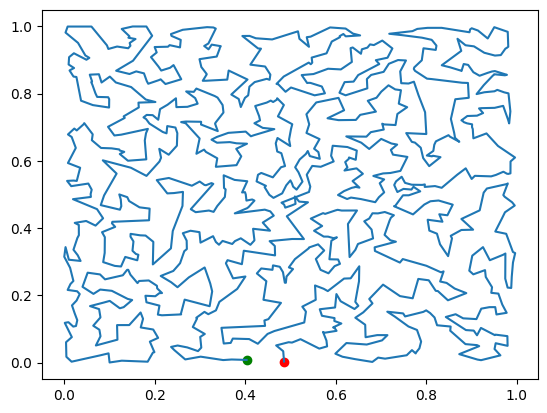

In [ ]:
print("length: ", route_length(new_route))
new_x = x[new_route]
new_y = y[new_route]

plt.plot(new_x, new_y)
plt.scatter(new_x[0], new_y[0], color = "green")
plt.scatter(new_x[-1], new_y[-1], color = "red")

In [ ]:
new_route2 = two_opt(new_route) #we re-run it again

  3%|▎         | 33/997 [00:13<06:23,  2.51it/s]


best:  25.059498552970208


  1%|          | 6/970 [00:02<06:13,  2.58it/s]


best:  25.056045004593905


  1%|          | 7/970 [00:03<07:53,  2.03it/s]


best:  25.0554311307462


100%|██████████| 969/969 [03:14<00:00,  4.97it/s]


Running it again does not improve it much further.

length:  25.0554311307462


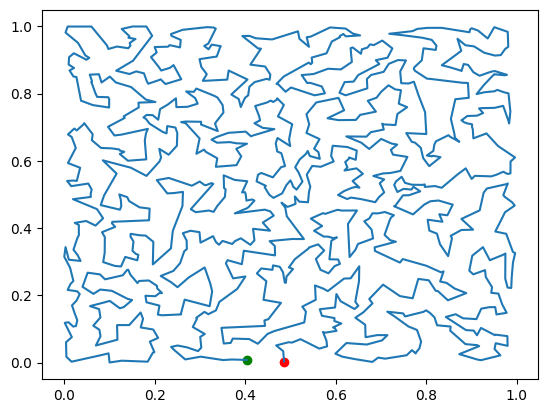

In [ ]:
print("length: ", route_length(new_route2))
new_x = x[new_route2]
new_y = y[new_route2]

plt.plot(new_x, new_y)
plt.scatter(new_x[0], new_y[0], color = "green")
plt.scatter(new_x[-1], new_y[-1], color = "red")

In [ ]:
new_route3 = two_opt(new_route2)

100%|██████████| 997/997 [03:27<00:00,  4.81it/s] 


Running it again no longer changes it, two-opt is done